<a href="https://colab.research.google.com/github/yurangja99/HanjaShortsGenerator/blob/main/HanjaShortsGenerator_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HanjaShortsGenerator Demo

Github: https://github.com/yurangja99/HanjaShortsGenerator.git

This demo clones [HanjaShortsGenerator](https://github.com/yurangja99/HanjaShortsGenerator.git), and generate a video for given keyword.

※ There are some things to do before running each script, please read carefully!

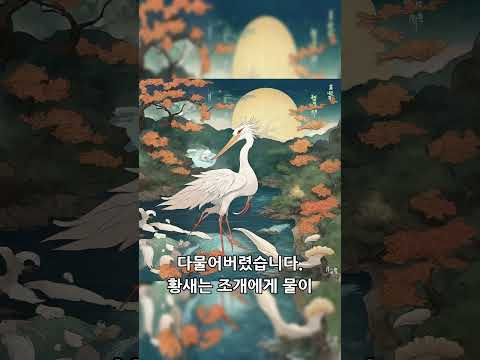

In [1]:
from IPython.display import YouTubeVideo

# Example video: 어부지리(漁夫之利)
YouTubeVideo('ly9RI1TmMJk', 450, 800)

## Setup

In [ ]:
# clone github repository
!git clone https://github.com/yurangja99/HanjaShortsGenerator.git

In [ ]:
# move to the project root
%cd /content/HanjaShortsGenerator

In [ ]:
# install requirements
!pip install --upgrade --quiet torch
!pip install --upgrade --quiet accelerate
!pip install --upgrade --quiet selenium
!pip install --upgrade --quiet openai
!pip install --upgrade --quiet google
!pip install --upgrade --quiet google-cloud-texttospeech
!pip install --upgrade --quiet mutagen
!pip install --upgrade --quiet Pillow
!pip install --upgrade --quiet diffusers
!pip install --upgrade --quiet transformers
!pip install --upgrade --quiet moviepy

## Setting Inputs

Before running cells below,
- log in to openai, and get API key
- log in to Pixabay, and get API key
- log in to Pexels, and get API key
- upload your google cloud platform json file.
- upload your korean ttf font file.

Each arguments are:
- keyword: keyword of the video (고사성어)
- param: defaults to "--all". can be one or more of [--all, --crawler, --author, --tts, --imager, --imager-parser, --imager-constructor, --imager-story, --imager-generator, --editor]
- width: width of the video
- height: height of the video

In [15]:
# @title Setting API Keys
openai_api_key = "key" # @param {type:"string"}
pixabay_api_key = "key" # @param {type:"string"}
pexels_api_key = "key" # @param {type:"string"}
google_json_path = "gcp.json" # @param {type:"string"}
font_file_path = "font.ttf" # @param {type:"string"}

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = google_json_path

with open("keys.py", "w") as f:
  f.write("\n".join([
    f"openai_api_key = \"{openai_api_key}\"",
    f"pixabay_api_key = \"{pixabay_api_key}\"",
    f"pexels_api_key = \"{pexels_api_key}\""
  ]))

In [13]:
# @title Setting Arguments
# @markdown param: one or more of [--all, --crawler, --author, --tts, --imager, --imager-parser, --imager-constructor, --imager-story, --imager-generator, --editor]
keyword = "" # @param {type:"string"}
param = "--all" # @param {type:"string"}
width = 1080 # @param {type:"slider", min:240, max:1080, step:10}
height = 1920 # @param {type:"slider", min:320, max:1920, step:10}

## Generate Video

In [ ]:
# generate video with given inputs
!python main.py "$keyword" $param \
  --width $width \
  --height $height \
  --font $font_file_path

In [ ]:
from google.colab import files

# download result directory
zipname = f"{keyword}.zip"
dirname = os.path.join("video_outputs", keyword)
!zip -r $zipname $dirname
files.download(zipname)

## (Optional) Regenerate Image

If your generated image is not the one you wanted, you can regenerate an image with your own prompt and init image.

Set your own inputs, and run `regenerate.py`.

Example: scene of one seashell bite a stork's beak, at a river

|Input Image|Regenerated Image|
|-|-|
|![](https://github.com/yurangja99/HanjaShortsGenerator/raw/main/assets/regenerate0-0.png)|![](https://github.com/yurangja99/HanjaShortsGenerator/raw/main/assets/regenerate0-1.png)|

In [19]:
# @title Setting Regeneration Config
prompt = "prompt" # @param {type:"string"}
init_image = "init_image.png" # @param {type:"string"}
strength = 0.8 # @param {type:"slider", min:0, max:1, step:0.1}
num_output_imgs = 2 # @param {type:"slider", min:1, max:4, step:1}


In [ ]:
# regenerate image
!python regenerate.py "$init_image" "$prompt" \
  --strength $strength \
  --num-imgs $num_output_imgs